In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import csv

# Read the csv files
death_file = os.path.join("Resources","Deaths_By_P&E.csv")
insurance_file = os.path.join("Resources","Insured_By_State.csv")

# Create Dataframes
deathFile_df = pd.read_csv(death_file)
insuranceFile_df = pd.read_csv(insurance_file, skiprows=[0,1])
insuranceFile_df
# Insurance file header
insuranceFile_df.head()

,Location,Employer,Non-Group,Medicaid,Medicare,Other Public,Uninsured,Total
0,United States,0.49,0.07,0.19,0.14,0.02,0.09,1.0
1,Alabama,0.47,0.05,0.21,0.16,0.03,0.09,1.0
2,Alaska,0.46,0.03,0.20,0.10,0.08,0.14,1.0
3,Arizona,0.44,0.05,0.21,0.15,0.03,0.12,1.0
4,Arkansas,0.44,0.09,0.21,0.17,0.02,0.08,1.0


In [19]:
# Death file header
deathFile_df.head()

,geoid,Region,State,age,season,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,pecent complete
0,National,NaN,NaN,All,2009-10,200940,149.0,3484.0,3633.0,46412.0,7.827717,97.546212
1,National,NaN,NaN,All,2009-10,200941,174.0,3703.0,3877.0,46453.0,8.346070,97.632384
2,National,NaN,NaN,All,2009-10,200942,239.0,3841.0,4080.0,47451.0,8.598344,99.729926
3,National,NaN,NaN,All,2009-10,200943,295.0,3762.0,4057.0,46432.0,8.737509,97.588247
4,National,NaN,NaN,All,2009-10,200944,298.0,3858.0,4156.0,47372.0,8.773115,99.563888


In [20]:
# Cleaning up the death data file

# Breaking up the "MMWR Year/Week" column and converting into just a "Year" Column
deathFile_df['Year'] = deathFile_df['MMWR Year/Week'].astype(str).str[0:4]

# Drops the season and MMWR Year/Week column
Drop_season_and_yearWeek_df= deathFile_df.drop(['season', 'MMWR Year/Week', 'pecent complete'], axis=1)
# Death file header
#Drop_season_and_yearWeek_df.head()

# Fixing spelling errors in column names
spell_check_df = Drop_season_and_yearWeek_df.rename(index=str, 
                                                    columns={"geoid": "Geo ID", 
                                                             "age": "Age", 
                                                             "Deaths from pneumonia and influenza": 
                                                             "Deaths from Pneumonia and Influenza", 
                                                             "Pecent of deaths due to pneumonia or influenza": 
                                                             "Percent of deaths due to Pneumonia or Influenza"})
# Spell check header
spell_check_df.head()

,Geo ID,Region,State,Age,Deaths from influenza,Deaths from pneumonia,Deaths from Pneumonia and Influenza,All Deaths,Percent of deaths due to Pneumonia or Influenza,Year
0,National,NaN,NaN,All,149.0,3484.0,3633.0,46412.0,7.827717,2009
1,National,NaN,NaN,All,174.0,3703.0,3877.0,46453.0,8.346070,2009
2,National,NaN,NaN,All,239.0,3841.0,4080.0,47451.0,8.598344,2009
3,National,NaN,NaN,All,295.0,3762.0,4057.0,46432.0,8.737509,2009
4,National,NaN,NaN,All,298.0,3858.0,4156.0,47372.0,8.773115,2009


In [21]:
# Creating a data frame for just the states
# Drop region column in the data frame
drop_region_df = pd.DataFrame(spell_check_df.drop(['Region', 'Deaths from influenza', 'Deaths from pneumonia'], axis=1))
drop_region_df.head()

,Geo ID,State,Age,Deaths from Pneumonia and Influenza,All Deaths,Percent of deaths due to Pneumonia or Influenza,Year
0,National,NaN,All,3633.0,46412.0,7.827717,2009
1,National,NaN,All,3877.0,46453.0,8.346070,2009
2,National,NaN,All,4080.0,47451.0,8.598344,2009
3,National,NaN,All,4057.0,46432.0,8.737509,2009
4,National,NaN,All,4156.0,47372.0,8.773115,2009


In [22]:
#Deaths from Pneumonia and Influenza in the year of 2016 of every state.
states_2016_pneu_influ = pd.DataFrame(spell_check_df.loc[spell_check_df["Year"] == "2016"].groupby("State")["Deaths from Pneumonia and Influenza"].sum())
# del states_2016_pneu_influ.index.name
deaths_vs_uninsured_df = states_2016_pneu_influ.drop(['New York City'])
deaths_vs_uninsured_df = deaths_vs_uninsured_df.drop(['District of Columbia'])
deaths_vs_uninsured_df
# newstates

,Deaths from Pneumonia and Influenza
State,
Alabama,2909.0
Alaska,237.0
Arizona,3502.0
Arkansas,2388.0
California,20086.0
Colorado,2171.0
Connecticut,2076.0
Delaware,533.0
Florida,11298.0


In [23]:
# Edit the data so that it appears as percentages
# Drop the total column
Drop_total_df = pd.DataFrame(insuranceFile_df.drop(['Total'], axis=1))

Drop_total_df

Drop_total_df = Drop_total_df.drop(Drop_total_df.index[52:78])
# Replace Null with 0
drop_null_df = Drop_total_df.fillna(0)

perc_df = drop_null_df.style.format({
   'Employer': '{:,.0%}'.format,
   'Non-Group': '{:,.0%}'.format,
   'Medicaid': '{:,.0%}'.format,
    'Medicare':'{:,.0%}'.format,
    'Other Public': '{:,.0%}'.format,
    'Uninsured':'{:,.0%}'.format
})

perc_df

,Location,Employer,Non-Group,Medicaid,Medicare,Other Public,Uninsured
0,United States,49%,7%,19%,14%,2%,9%
1,Alabama,47%,5%,21%,16%,3%,9%
2,Alaska,46%,3%,20%,10%,8%,14%
3,Arizona,44%,5%,21%,15%,3%,12%
4,Arkansas,44%,9%,21%,17%,2%,8%
5,California,46%,8%,25%,11%,1%,8%
6,Colorado,52%,7%,16%,13%,3%,10%
7,Connecticut,54%,6%,20%,14%,0%,6%
8,Delaware,47%,4%,22%,16%,2%,9%
9,District of Columbia,51%,7%,24%,11%,0%,5%


In [24]:
uninsured_FiftyStates = drop_null_df.drop(drop_null_df.index[0])
# FiftyStates = drop_null_df.drop(drop_null_df.index[9])
uninsured_FiftyStates = uninsured_FiftyStates[uninsured_FiftyStates.Location != 'District of Columbia']
uninsured_FiftyStates = uninsured_FiftyStates.reset_index()
uninsured_FiftyStates_1 = uninsured_FiftyStates.rename(columns={"Location":"State"})
uninsured_FiftyStates_2 = uninsured_FiftyStates_1.set_index('State')
uninsured_FiftyStates_2 = uninsured_FiftyStates_2[['Uninsured']]
uninsured_FiftyStates_2['Uninsured'] = uninsured_FiftyStates_2['Uninsured']*100
uninsured_FiftyStates_2

# uninsured_FiftyStates*100
# drop_null_df

,Uninsured
State,
Alabama,9.0
Alaska,14.0
Arizona,12.0
Arkansas,8.0
California,8.0
Colorado,10.0
Connecticut,6.0
Delaware,9.0
Florida,12.0


In [25]:
deaths_vs_uninsured_df = pd.merge(deaths_vs_uninsured_df, uninsured_FiftyStates_2, left_index=True, right_index=True)
# deaths_vs_uninsured_df["Percent Uninsured"] = uninsured_series
deaths_vs_uninsured_df


,Deaths from Pneumonia and Influenza,Uninsured
State,,
Alabama,2909.0,9.0
Alaska,237.0,14.0
Arizona,3502.0,12.0
Arkansas,2388.0,8.0
California,20086.0,8.0
Colorado,2171.0,10.0
Connecticut,2076.0,6.0
Delaware,533.0,9.0
Florida,11298.0,12.0


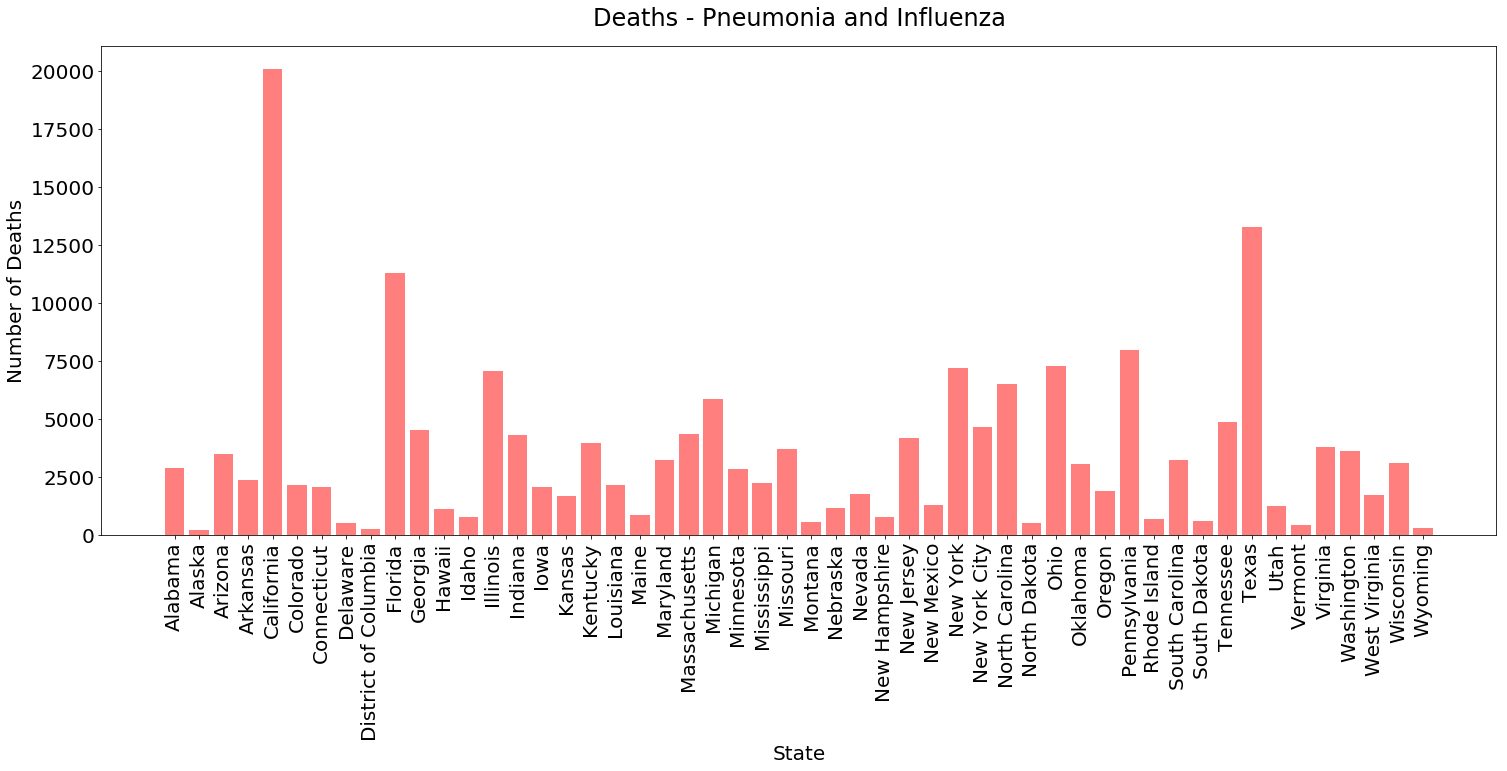

In [26]:
x_axis = np.arange(len(states_2016_pneu_influ))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, states_2016_pneu_influ["Deaths from Pneumonia and Influenza"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, states_2016_pneu_influ.index, rotation="vertical")
plt.title("Deaths - Pneumonia and Influenza")
plt.xlabel("State")
plt.ylabel("Number of Deaths")
plt.show()


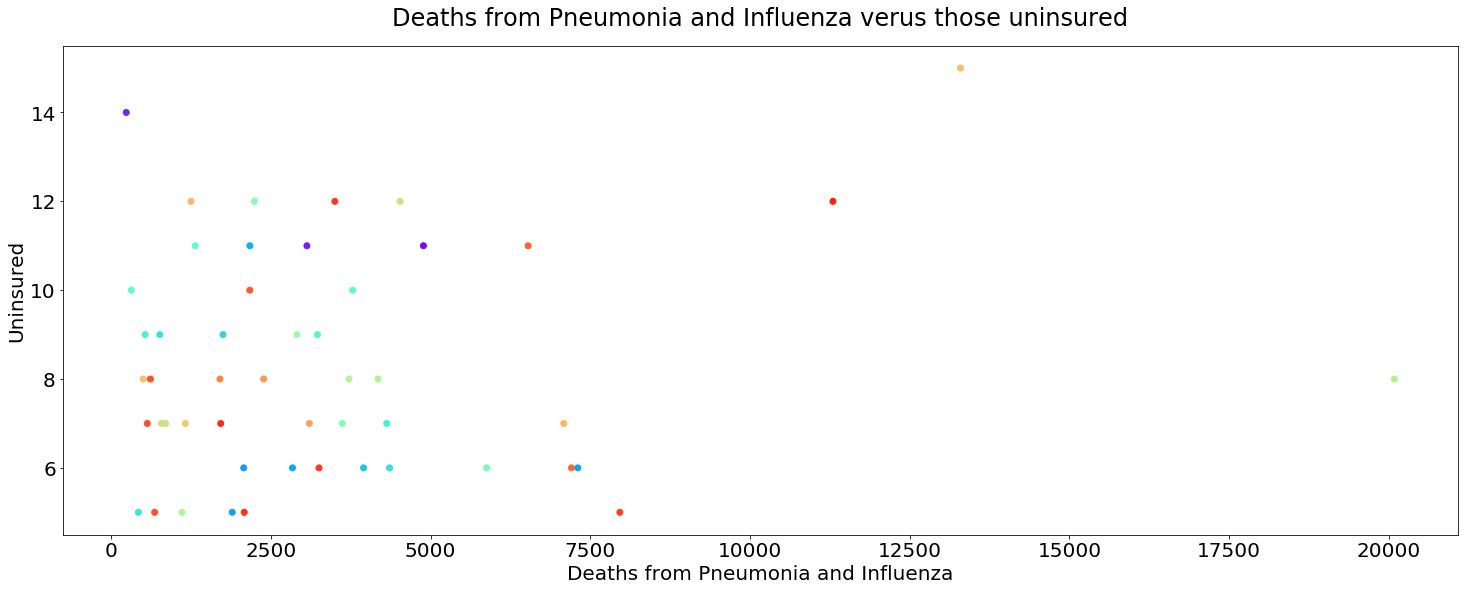

In [27]:
Xaxis = deaths_vs_uninsured_df["Deaths from Pneumonia and Influenza"]
Yaxis = deaths_vs_uninsured_df['Uninsured']

plt.xlabel('Deaths from Pneumonia and Influenza')
plt.ylabel('Uninsured')
plt.title('Deaths from Pneumonia and Influenza verus those uninsured')




fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5

colors=cm.rainbow(np.random.rand(51))
plt.scatter(Xaxis, Yaxis, marker="o", color=colors)
plt.show()

       Deaths from Pneumonia and Influenza  Uninsured
count                            50.000000  50.000000
mean                           3544.200000   8.320000
std                            3648.164067   2.543018
min                             237.000000   5.000000
25%                            1184.750000   6.000000
50%                            2613.500000   8.000000
75%                            4280.250000  10.000000
max                           20086.000000  15.000000


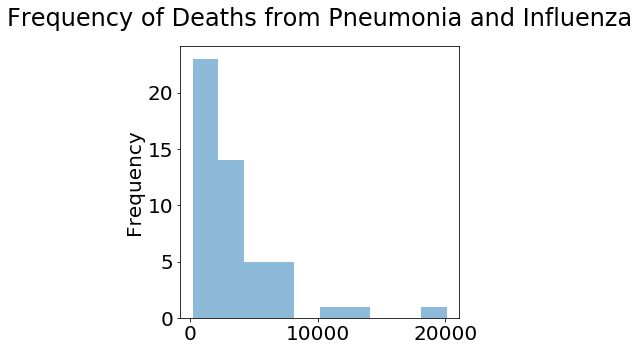

In [28]:
print(deaths_vs_uninsured_df.describe())
deaths_vs_uninsured_df["Deaths from Pneumonia and Influenza"].plot.hist(alpha=.5)
plt.title('Frequency of Deaths from Pneumonia and Influenza')
plt.show()

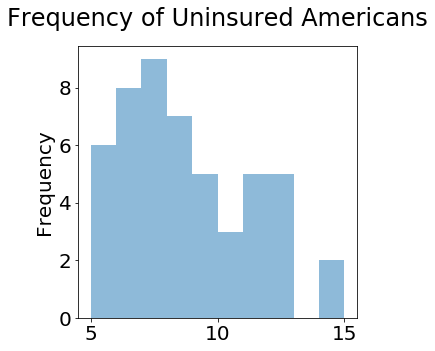

In [29]:
deaths_vs_uninsured_df['Uninsured'].plot.hist(alpha=.5)
# deaths_vs_uninsured_df.plot.hist(stacked=True, alpha=.5)
plt.title("Frequency of Uninsured Americans")
plt.show()

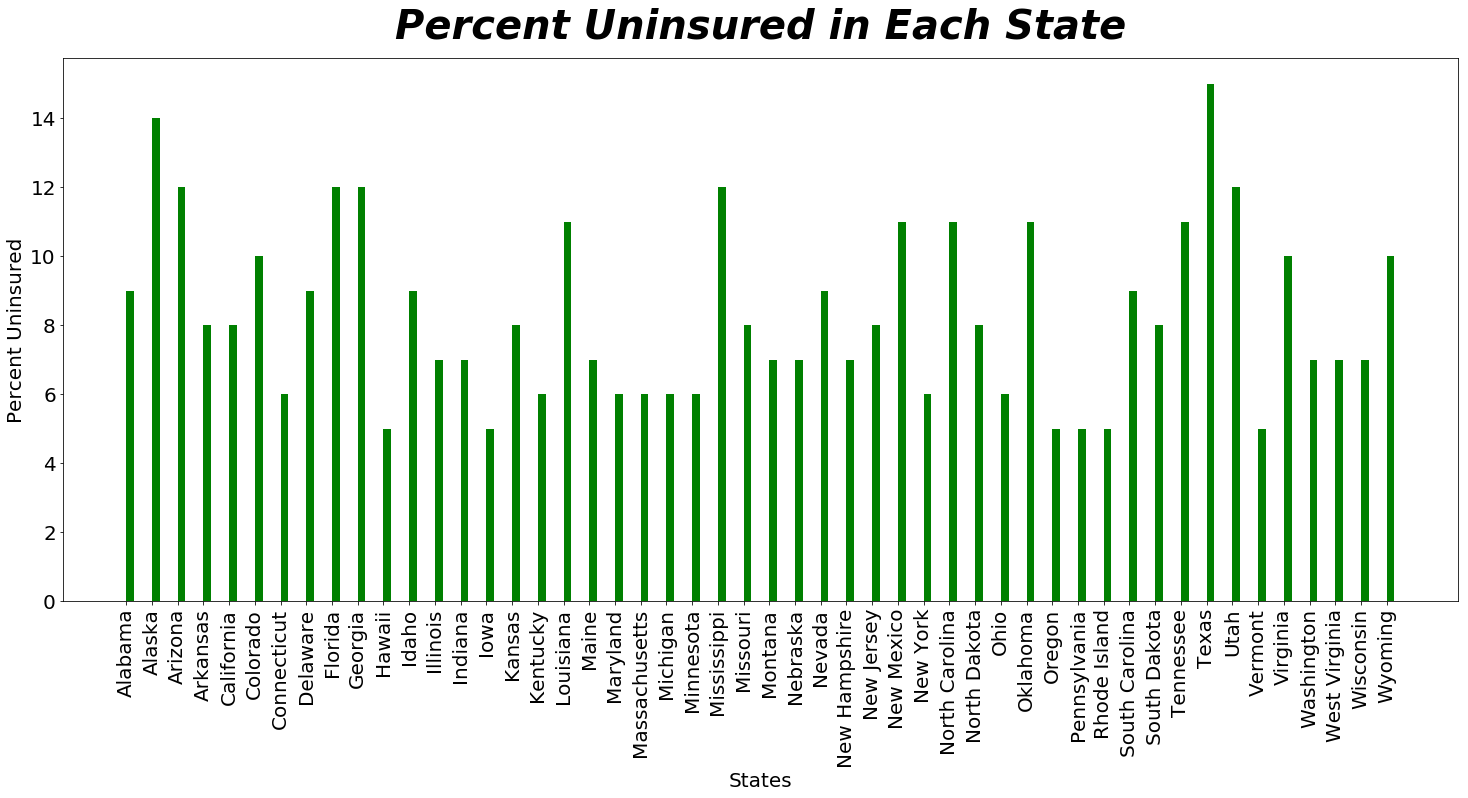

In [31]:
# Set X-axis and Y-axis
xaxis=uninsured_FiftyStates_1["State"]

yaxis=uninsured_FiftyStates_1["Uninsured"]*100

# Choose style of graph,rotation of ticks, and font size of ticks

plt.bar(xaxis,yaxis, align='edge', color='g', width=.3)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=20)
 
# # Set figure width and height
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 10




# Form title, choose fontsize, fontweight, and style. Additionally, add spacing between title and chart
plt.title('Percent Uninsured in Each State', fontsize=40, fontweight="bold", style='italic')
plt.rcParams['axes.titlepad'] = 20

plt.xlabel('States')
plt.ylabel('Percent Uninsured')

# Display graph
plt.show()

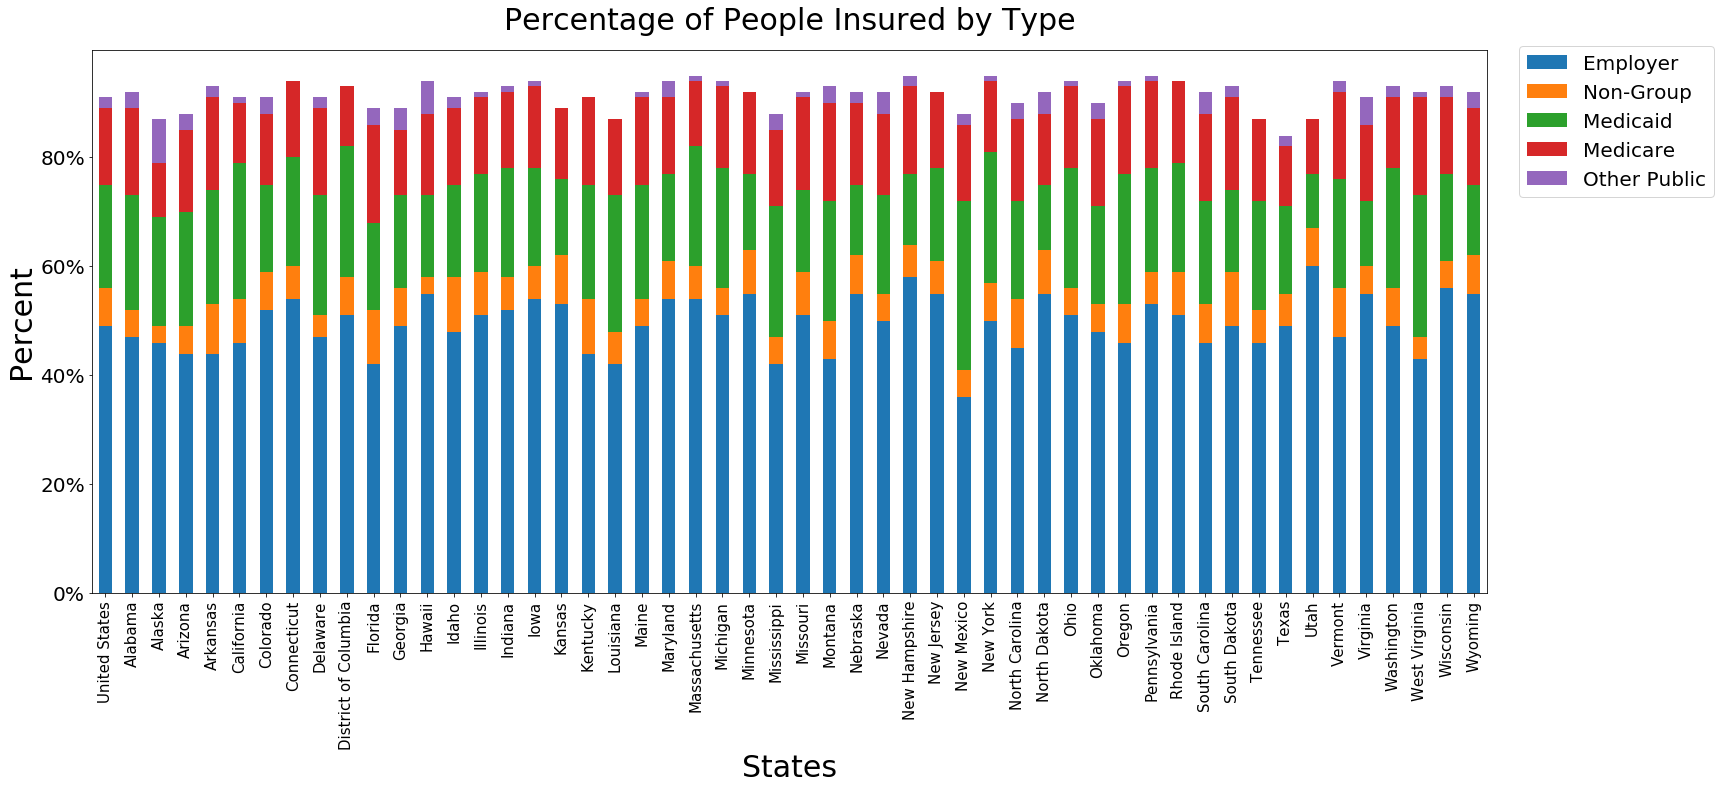

In [32]:
# Removing the uninsured column to adjust for the chart
remove_uninsured_df = pd.DataFrame(drop_null_df.drop(['Uninsured'], axis=1))
xaxis=drop_null_df["Location"]

# Plots the graph
graph = remove_uninsured_df.plot.bar(xaxis,stacked=True)

# Formats the graph
plt.title('Percentage of People Insured by Type', size = 30)
plt.ylabel('Percent', size = 30)
plt.xlabel('States', size = 30)
plt.legend(loc='upper right', bbox_to_anchor=(1.17, 1.025), prop={'size': 20})
plt.xticks(size = 15)
plt.yticks(size = 20)

# Converts the y axis to percentages
graph.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

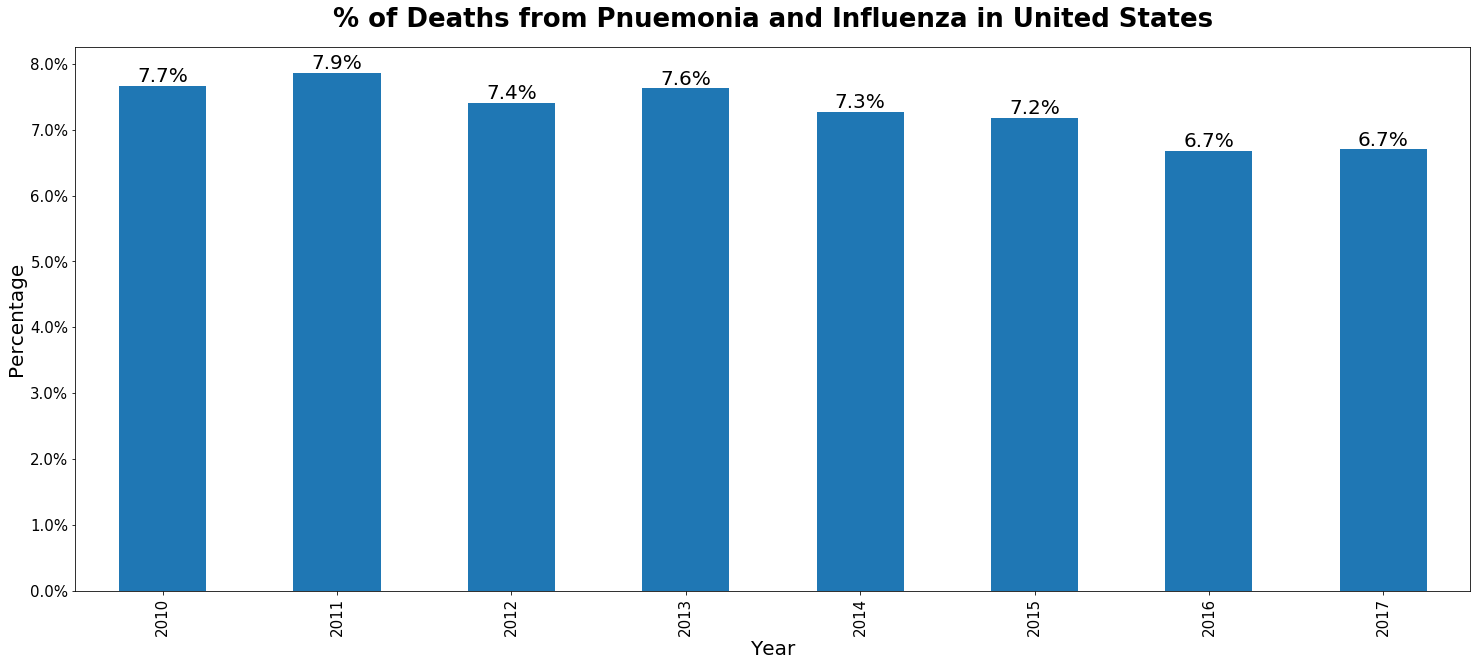

In [33]:
#new dataframe which includes data from Deaths from influe/pneu/influ & pneu combined and All other deaths.
national_df = pd.DataFrame(spell_check_df[["Geo ID", "Deaths from influenza","Deaths from pneumonia",
                              "Deaths from Pneumonia and Influenza","All Deaths","Year"]])

#Change the dstype from float to Integer and Groupby using Year. 
national_df = national_df.loc[national_df["Geo ID"] == "National"].groupby("Year").sum().astype(int)

#drop the rows for the year 2009 and 2018 because we only want to include the years with data from all 52 weeks.
national_df = national_df.drop(["2009","2018"])

#How many % of people died from Pneumonia and influenza. Calculate from All deaths.
national_df["% Deaths from Pneumonia and Influenza"] = (national_df["Deaths from Pneumonia and Influenza"]/
                                                         national_df["All Deaths"])
national_df.style.format({"% Deaths from Pneumonia and Influenza": '{:,.1%}'.format})

#Plot
ax = national_df["% Deaths from Pneumonia and Influenza"].plot(kind="Bar")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, '{:,.1%}'.format(height), ha='center', va='bottom')
plt.title("% of Deaths from Pnuemonia and Influenza in United States", fontsize=26, fontweight="bold")
plt.ylabel("Percentage",size=20)
plt.xlabel("Year",size=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.rcParams["figure.figsize"] = [25,9]
plt.rcParams.update({'font.size': 20})
plt.show()

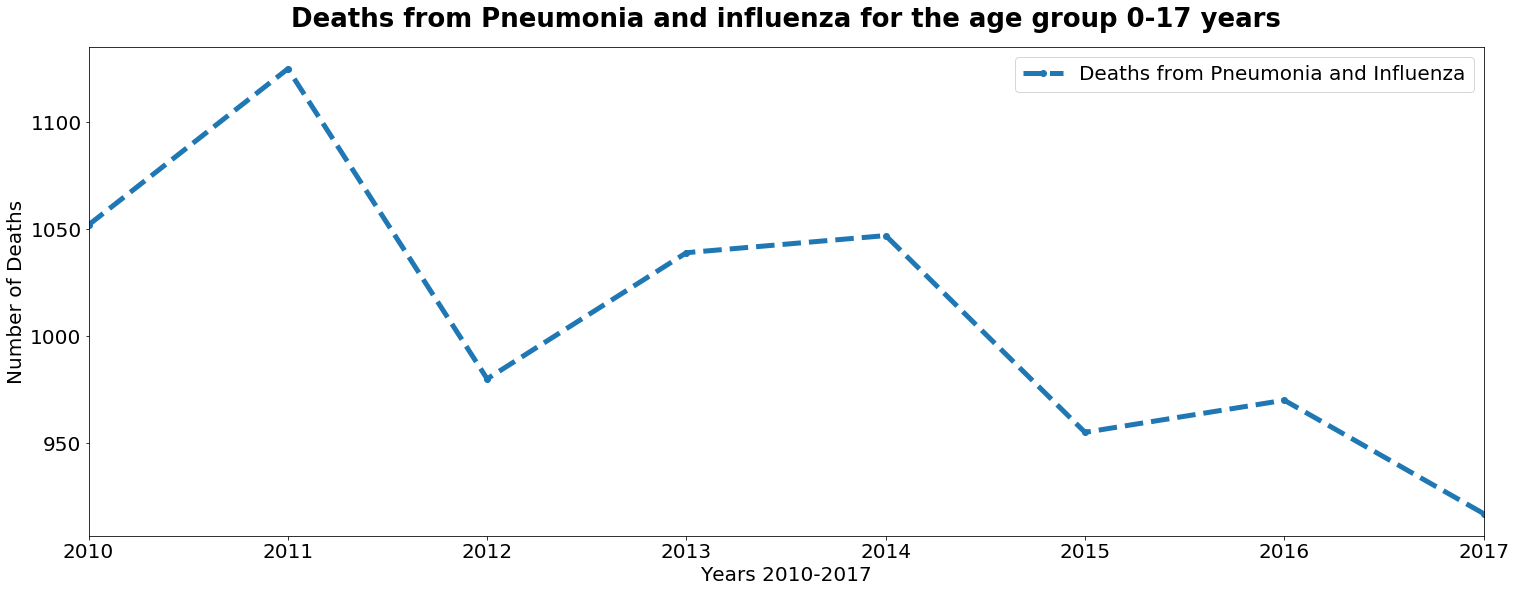

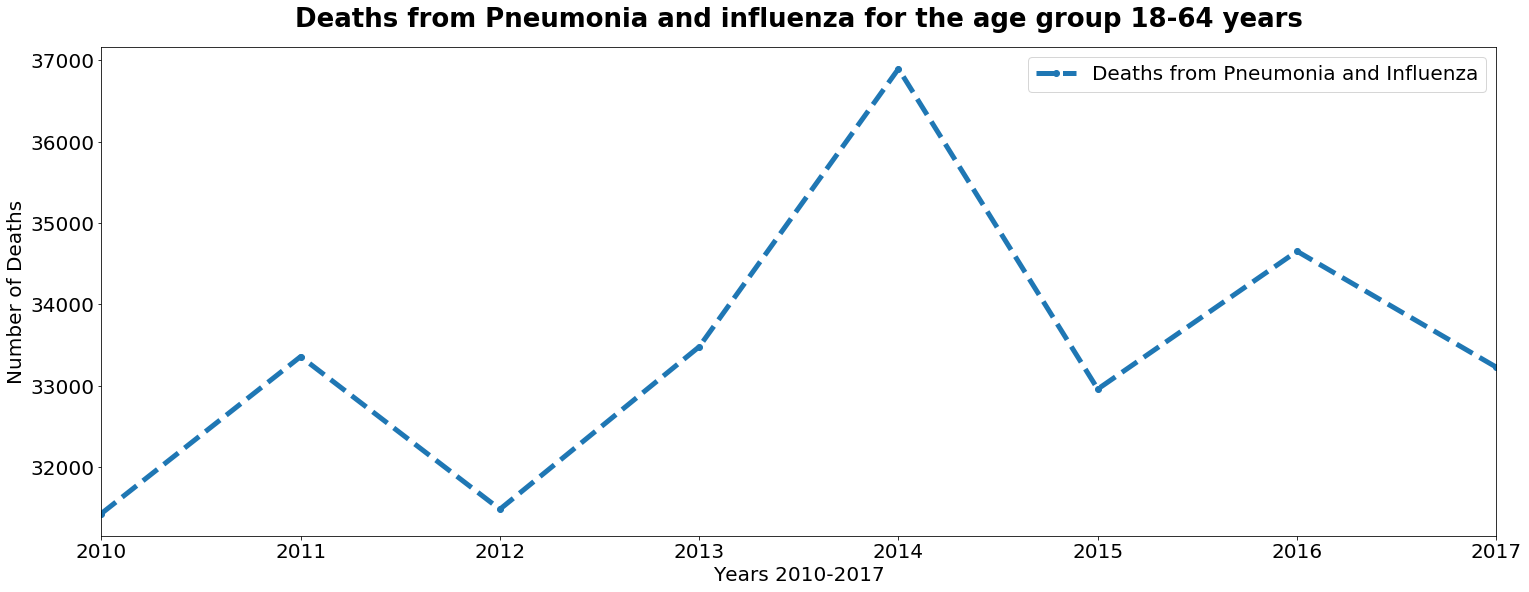

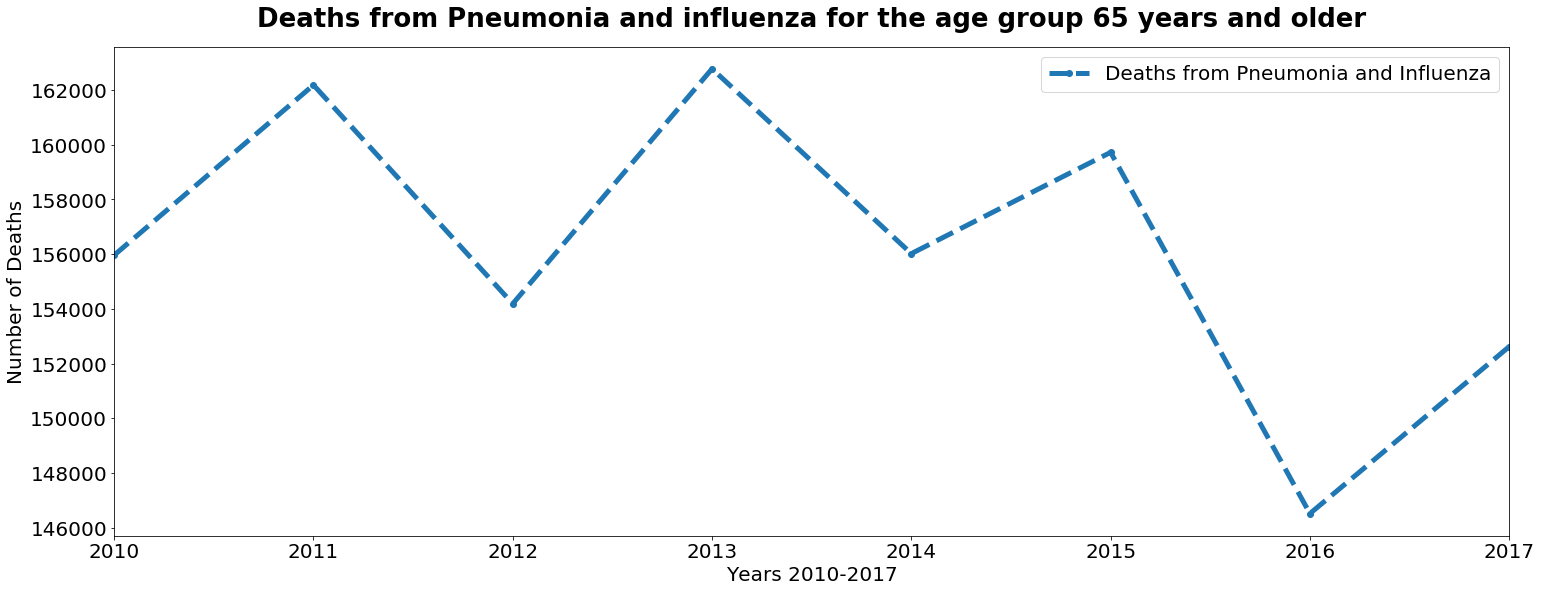

In [34]:
#Create a Dataframe with only Geo Id, age group, combined deaths from Pneu & Influ and years.
ageGroup_df = pd.DataFrame(spell_check_df[["Geo ID","Age","Deaths from Pneumonia and Influenza","Year"]])
ageGroup_df = ageGroup_df.groupby(["Year","Age"])["Deaths from Pneumonia and Influenza"].sum()
ageGroup_df = ageGroup_df.drop(["2009","2018"]).reset_index()

#Make line graph for only 0-17 years of age group for the combined deaths from Pneu and influ for each year. 
ageGroup_df_0to17 = ageGroup_df[ageGroup_df["Age"] == "0-17 years"].set_index("Year")
ageGroup_df_0to17.plot(kind="line",linestyle='--', marker='o',linewidth=5)
plt.ylabel('Number of Deaths')
plt.xlabel('Years 2010-2017')
plt.title('Deaths from Pneumonia and influenza for the age group 0-17 years',fontsize=26, fontweight="bold")


#Make line graph for only 18-64 years of age group for the combined deaths from Pneu and influ for each year. 
ageGroup_df_18to64 = ageGroup_df[ageGroup_df["Age"] == "18-64 years"].set_index("Year")
ageGroup_df_18to64.plot(kind="line",linestyle='--', marker='o',linewidth=5)
plt.ylabel('Number of Deaths')
plt.xlabel('Years 2010-2017')
plt.title('Deaths from Pneumonia and influenza for the age group 18-64 years',fontsize=26, fontweight="bold")


#Make line graph for only 65 years and older for the combined deaths from Pneu and influ for each year. 
ageGroup_df_65up = ageGroup_df[ageGroup_df["Age"] == "65 years and older"].set_index("Year")
ageGroup_df_65up.plot(kind="line",linestyle='--', marker='o',linewidth=5)
plt.ylabel('Number of Deaths')
plt.xlabel('Years 2010-2017')
plt.title('Deaths from Pneumonia and influenza for the age group 65 years and older',fontsize=26, fontweight="bold")
plt.show()
